In [ ]:
import ee
from DataService import DataService
from shapely.ops import cascaded_union
import shapely
import sqlalchemy
import geopandas as gpd
import geemap
from rasterio.plot import show_hist
import rasterio
from matplotlib import pyplot

In [ ]:
ee.Authenticate()
ee.Initialize()

In [ ]:
DATASET = "ECMWF/ERA5_LAND/HOURLY"
FIRST_DATE = '2022-05-22' #1995-01-01                          # string
LAST_DATE = '2022-05-23'
BANDS = []

In [157]:
# connect to the database
db = DataService()
conn = db.connect()
query = sqlalchemy.text('select geometry FROM public.census_ag_regions')


df = gpd.read_postgis(query, conn, geom_col='geometry')
ag_regions = df.unary_union

gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[ag_regions])
gdf.set_crs("EPSG:4326", allow_override=True)

#print(df)
#s = gpd.GeoSeries(polygons)
#gdf = gpd.GeoDataFrame(df)
#
#geo_json = gdf.to_json()
#print(geo_json)
#featureCollection = ee.FeatureCollection(json.loads(geo_json))
#print(featureCollection)
#union = 

#plt.show()

In [158]:
rasterImg = ee.ImageCollection(DATASET)

#
skinTemp = rasterImg.select('skin_temperature').filterDate(FIRST_DATE, LAST_DATE).filterBounds(ag_regions)

EEException: Invalid GeoJSON geometry.

In [ ]:
first = skinTemp.first()
link = first.getDownloadURL({
    'crs': 'EPSG:4326',
    'fileFormat': 'GeoTIFF'
})

print(link)

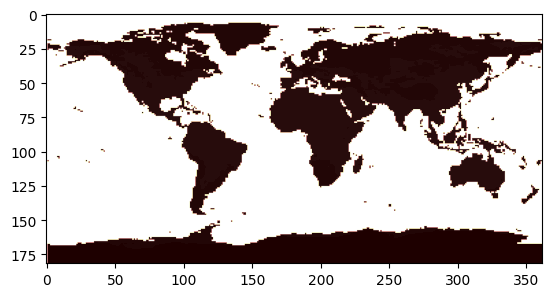

In [121]:
#20220522T00.skin_temperature.tif


src = rasterio.open("data/20220522T00.skin_temperature.tif")
pyplot.imshow(src.read(1), cmap='pink')

pyplot.show()

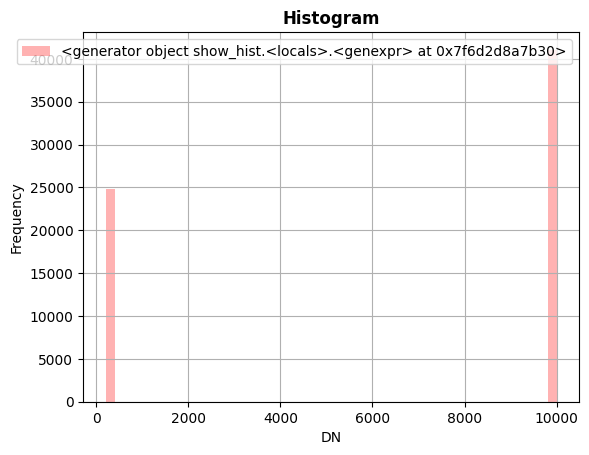

In [122]:
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

In [ ]:
geemap.js_snippet_to_py()
